In [1]:
#importing libariers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [3]:
#loading dataset
df_train=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
df_test=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')

In [4]:
#columns
df_train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [5]:
df_test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

we can see subscribed is the target variable

In [6]:
# checking the datatypes and info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


# checking the shape for both dataset

In [8]:
df_train.shape

(31647, 18)

In [9]:
df_test.shape

(13564, 17)

we can notice there are 17  similar features in both dataset  and 'subscribed 'is the target variable is to be predicted. 

# Explore the data

In [10]:
# show the five line of each dataset
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [11]:
# same for the test dataset
df_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [12]:
# checking the missing values for train dataset
df_train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [13]:
# checking the missing values for train dataset
df_test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

we see that there is no missing values in both dataset.

# Univariate Analysis

In [15]:
# checking value counts for 'subscribed' colms
df_train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

<AxesSubplot:xlabel='subscribed', ylabel='count'>

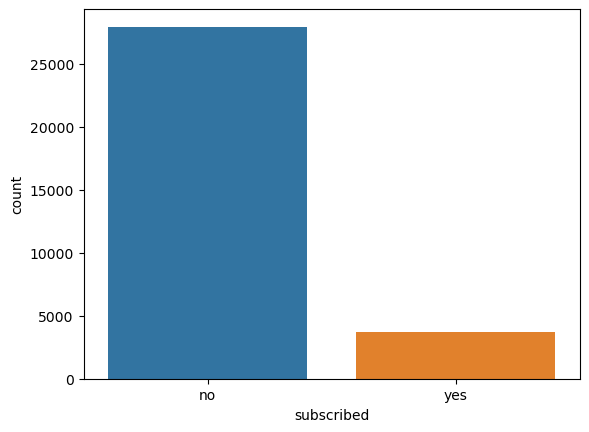

In [16]:
# ploting tht'subscribed' col
sns.countplot(data=df_train, x='subscribed')

In [17]:
#normalize the 'subscribed' variable
df_train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

we can notice that very less percentage of people that subscribed 

<AxesSubplot:xlabel='age', ylabel='Density'>

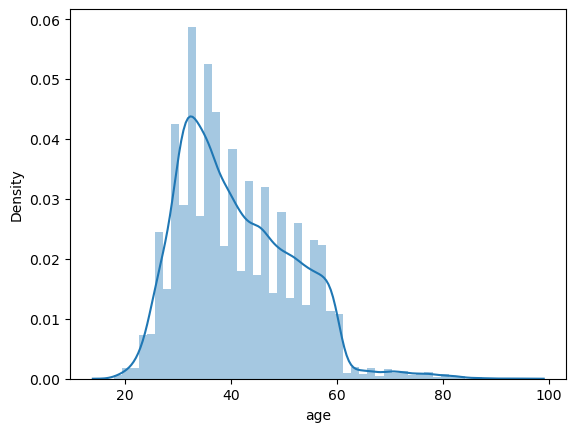

In [18]:
# check the distribution for 'age'
sns.distplot(df_train['age'])

we can see most of the client falls inthe age group between 20t  to 60 .

<AxesSubplot:>

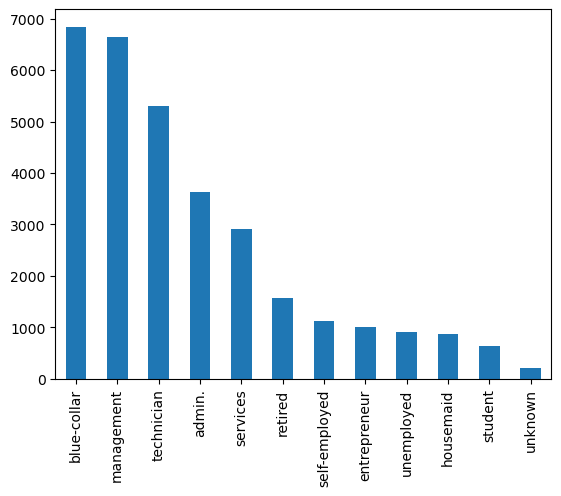

In [19]:
#value counts for  job col
df_train['job'].value_counts().plot.bar()

we see the most of the client belongs to blue-coller job and student are also in less no.as they didnt take aterm deposit.

<AxesSubplot:>

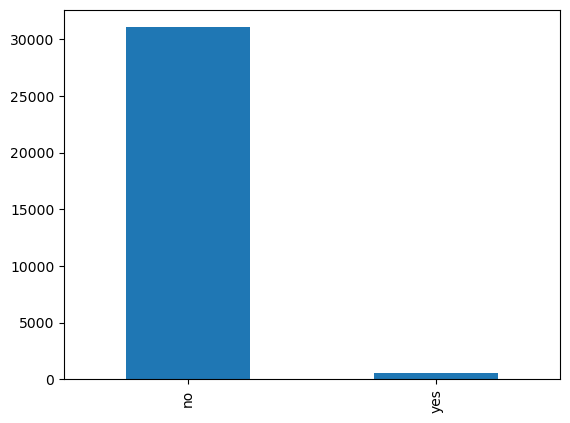

In [21]:
# now checking the 'default ' col
df_train['default'].value_counts().plot.bar()

more than 90% of people have no default history 

# Biveriate Analysis 


subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'Percentage')

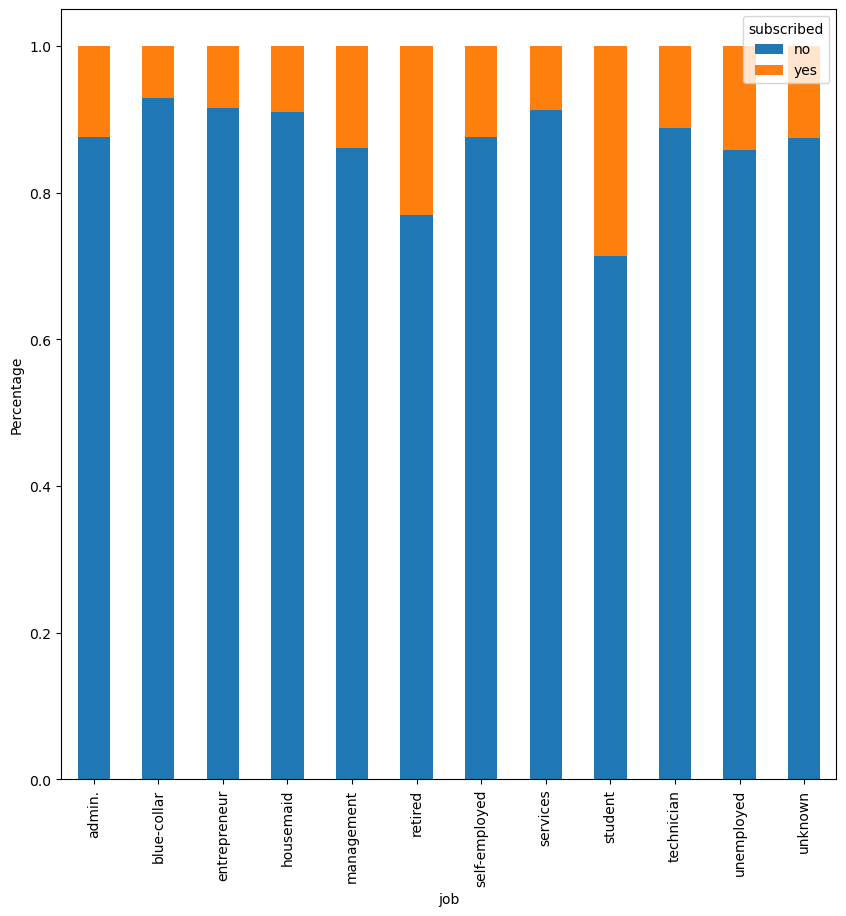

In [24]:
print(pd.crosstab(df_train['job'],df_train['subscribed']))
job=pd.crosstab(df_train['job'],df_train['subscribed'])
job.div(job.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(10,10))
plt.xlabel('job')
plt.ylabel('Percentage')


by the above plot we can notice that  student and retired people have higher chance to subscribe  to a term deposit

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

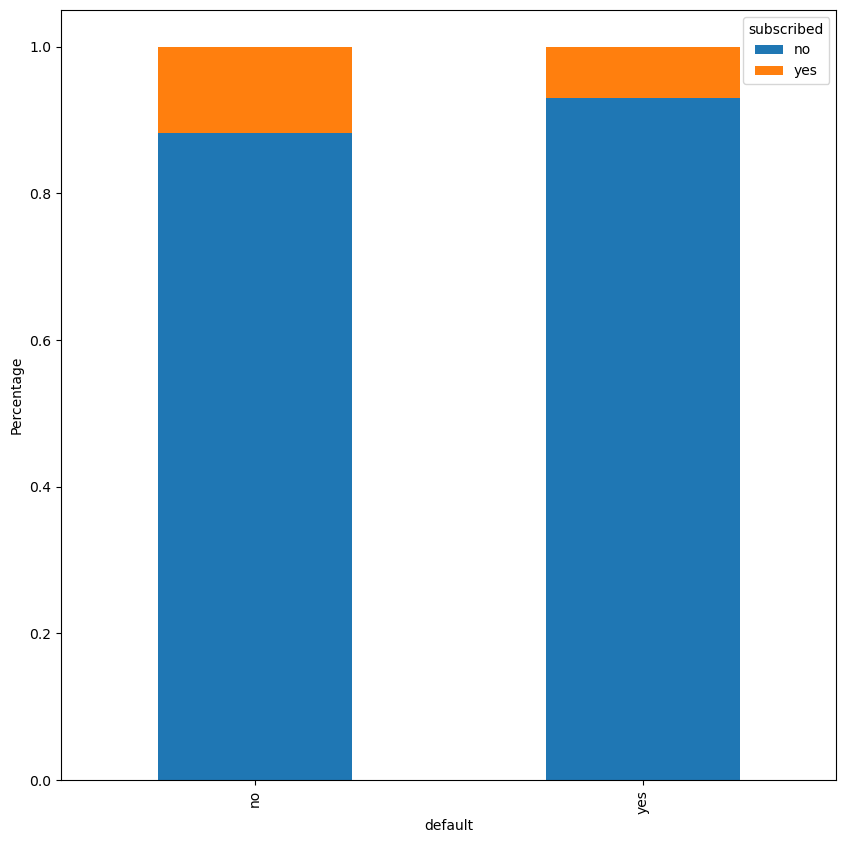

In [25]:
print(pd.crosstab(df_train['default'],df_train['subscribed']))
job=pd.crosstab(df_train['default'],df_train['subscribed'])
job.div(job.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(10,10))
plt.xlabel('default')
plt.ylabel('Percentage')


we can see slightly difference between both the variables

In [26]:
# convert the target variable into numeric values
df_train['subscribed'].replace('no',0,inplace=True)
df_train['subscribed'].replace('yes',1,inplace=True)


In [28]:
#check the modification
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0


we can see the values are changed to numeric of the 'subscribed ' col

<AxesSubplot:>

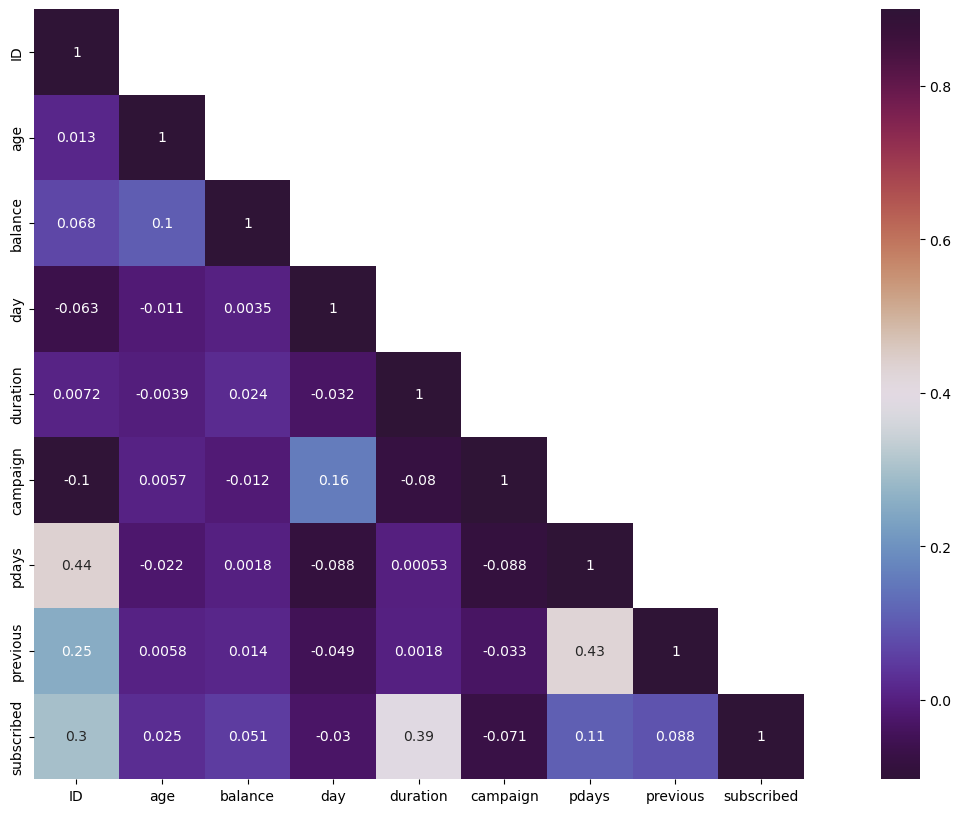

In [32]:
corr=df_train.corr()
mask=np.array(corr)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr,mask=mask,vmax=.9,square=True,annot=True,cmap='twilight_shifted')


in the above plot we notice that call is highly correlated with the target variable . as the duration of the call is more, there are higher chances that the client is showing interest in the term deposit and chance is higher that the client will subscribe the term deposit.

# Model Building

In [33]:
target= df_train['subscribed']
df_train=df_train.drop('subscribed',1)

In [34]:
#dummies application on train dataset
df_train=pd.get_dummies(df_train)

# Training and Testing the data

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(df_train,target,test_size=0.2,random_state=10)

# Building the Logistic Regression Model

In [37]:
from sklearn.linear_model import LogisticRegression

In [39]:
reg = LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [40]:
#prediction
pred = reg.predict(x_val)

In [43]:
# accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_val,pred)

0.891785150078989

we got almost 90% accuracy with the logistic regression model.

# Decision Tree algorithm

In [44]:
from sklearn.tree import DecisionTreeClassifier
#difining the decision tree model
clf = DecisionTreeClassifier(max_depth=4,random_state=0)


In [45]:
# fitting the decision tree model
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [46]:
#making prediction
prediction = clf.predict(x_val)

In [48]:
# checking accuracy score
accuracy_score(y_val,prediction)

0.9083728278041074

we got an accuracy of more than 90% 

In [51]:
df_test=pd.get_dummies(df_test)

In [52]:
df_test_pred = clf.predict(df_test)

Saving the file to CSv file

In [53]:
final_prediction = pd.DataFrame()

In [55]:
#creating a columns and saving the prediction 
final_prediction['ID']=df_test['ID']
final_prediction['subscribed'] = df_test_pred

In [59]:
#converting 1 and 0 to yes anfd no
final_prediction['subscribed'].replace(0,'no',inplace=True)
final_prediction['subscribed'].replace(1,'yes',inplace=True)

In [61]:
final_prediction.to_csv('final_predictions.csv',header=True,index=False)